/
/
epoch:0, train acc:0.11666666666666667, test acc:0.0986
epoch:1, train acc:0.12666666666666668, test acc:0.1053
epoch:2, train acc:0.14333333333333334, test acc:0.1165
epoch:3, train acc:0.15, test acc:0.1229
epoch:4, train acc:0.16333333333333333, test acc:0.1291
epoch:5, train acc:0.18666666666666668, test acc:0.1433
epoch:6, train acc:0.22, test acc:0.1544
epoch:7, train acc:0.21333333333333335, test acc:0.1563
epoch:8, train acc:0.23333333333333334, test acc:0.1617
epoch:9, train acc:0.25333333333333335, test acc:0.1687
epoch:10, train acc:0.25, test acc:0.1796
epoch:11, train acc:0.27666666666666667, test acc:0.1839
epoch:12, train acc:0.2866666666666667, test acc:0.2014
epoch:13, train acc:0.2966666666666667, test acc:0.2079
epoch:14, train acc:0.31, test acc:0.2146
epoch:15, train acc:0.33666666666666667, test acc:0.2332
epoch:16, train acc:0.34, test acc:0.2299
epoch:17, train acc:0.37, test acc:0.254
epoch:18, train acc:0.3566666666666667, test acc:0.2602
epoch:19, train a

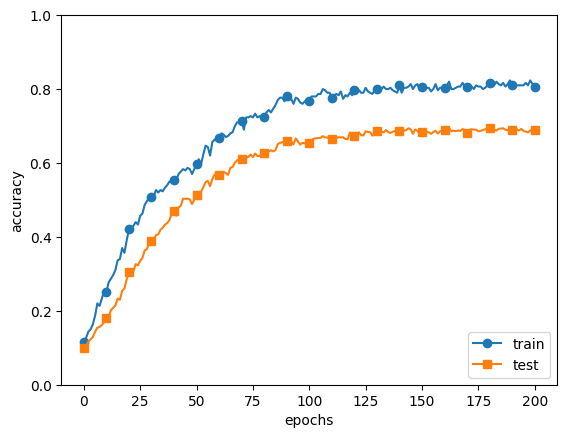

In [13]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test,t_test) = load_mnist(normalize=True)

#오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

#weight decay(가중치 감쇠) 설정
#weight_decay_lambda = 0 #weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.11

network = MultiLayerNet(
        input_size=784, hidden_size_list=[100,100,100,100,100,100],output_size=10,weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr = 0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list=[]
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch:'+str(epoch_cnt)+', train acc:'+str(train_acc)+', test acc:'+str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

#그래프그리기
markers = {'train':'o','test':'s' }
x = np.arange(max_epochs)
plt.plot(x,train_acc_list, marker='o', label = 'train', markevery = 10)
plt.plot(x, test_acc_list, marker='s', label = 'test', markevery = 10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc = 'lower right')
plt.show()